In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, PROJECT_ROOT)

from src.baseline import (naive_forecast, moving_average_forecast)

PROCESSED_DIR = os.path.join(PROJECT_ROOT, "data", "processed")
FIG_DIR = os.path.join(PROJECT_ROOT, "results", "figures")
METRICS_DIR = os.path.join(PROJECT_ROOT, "results", "metrics")

os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(METRICS_DIR, exist_ok=True)

print("PROJECT_ROOT:", PROJECT_ROOT)
print("PROCESSED_DIR:", PROCESSED_DIR)

PROJECT_ROOT: /home/samanta/Desktop/pharmacy-sales-prediction-lstm-model
PROCESSED_DIR: /home/samanta/Desktop/pharmacy-sales-prediction-lstm-model/data/processed


In [3]:
daily_train = pd.read_csv(os.path.join(PROCESSED_DIR, "daily_train.csv"), parse_dates=["ds"])
daily_val   = pd.read_csv(os.path.join(PROCESSED_DIR, "daily_val.csv"), parse_dates=["ds"])
daily_test  = pd.read_csv(os.path.join(PROCESSED_DIR, "daily_test.csv"), parse_dates=["ds"])

weekly_train = pd.read_csv(os.path.join(PROCESSED_DIR, "weekly_train.csv"), parse_dates=["ds"])
weekly_val   = pd.read_csv(os.path.join(PROCESSED_DIR, "weekly_val.csv"), parse_dates=["ds"])
weekly_test  = pd.read_csv(os.path.join(PROCESSED_DIR, "weekly_test.csv"), parse_dates=["ds"])

print("Daily test range:", daily_test["ds"].min(), "→", daily_test["ds"].max(), "rows:", len(daily_test))
print("Weekly test range:", weekly_test["ds"].min(), "→", weekly_test["ds"].max(), "rows:", len(weekly_test))

Daily test range: 2019-01-01 00:00:00 → 2019-10-08 00:00:00 rows: 281
Weekly test range: 2019-01-06 00:00:00 → 2019-10-13 00:00:00 rows: 41


In [4]:
def mae_rmse(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

def plot_forecast(dates, y_true, y_pred, title, out_path):
    plt.figure()
    plt.plot(dates, y_true, label="Actual")
    plt.plot(dates, y_pred, label="Predicted")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Quantity")
    plt.legend()
    plt.tight_layout()
    plt.savefig(out_path, dpi=200)
    plt.show()
    print("Saved:", out_path)


Daily Naive -> MAE: 17.86285476187857 | RMSE: 24.109943464635027


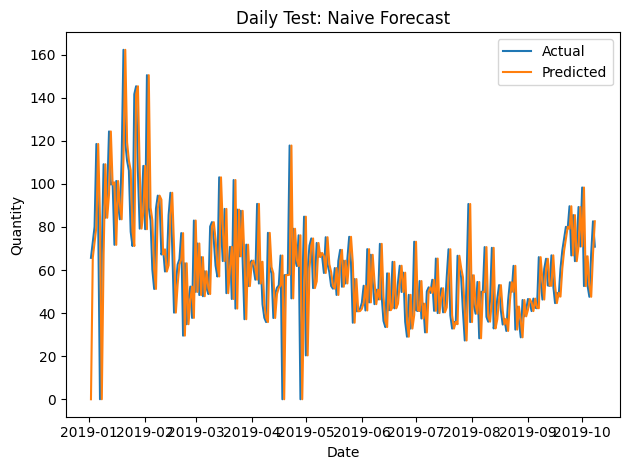

Saved: /home/samanta/Desktop/pharmacy-sales-prediction-lstm-model/results/figures/baseline_daily_naive.png
Weekly Naive -> MAE: 61.7565 | RMSE: 82.24473260749394


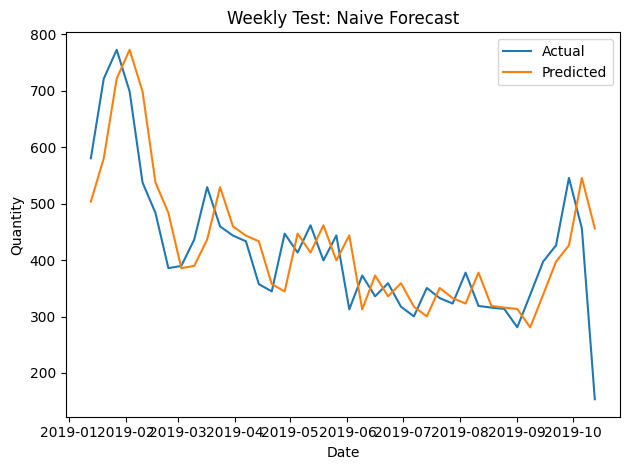

Saved: /home/samanta/Desktop/pharmacy-sales-prediction-lstm-model/results/figures/baseline_weekly_naive.png


In [5]:
daily_test_pred_naive = naive_forecast(daily_test["y"])
mask = daily_test_pred_naive.notna()
mae_d, rmse_d = mae_rmse(daily_test.loc[mask, "y"], daily_test_pred_naive.loc[mask])

print("Daily Naive -> MAE:", mae_d, "| RMSE:", rmse_d)

plot_forecast(
    daily_test.loc[mask, "ds"],
    daily_test.loc[mask, "y"],
    daily_test_pred_naive.loc[mask],
    "Daily Test: Naive Forecast",
    os.path.join(FIG_DIR, "baseline_daily_naive.png")
)

# WEEKLY
weekly_test_pred_naive = naive_forecast(weekly_test["y"])
maskw = weekly_test_pred_naive.notna()
mae_w, rmse_w = mae_rmse(weekly_test.loc[maskw, "y"], weekly_test_pred_naive.loc[maskw])

print("Weekly Naive -> MAE:", mae_w, "| RMSE:", rmse_w)

plot_forecast(
    weekly_test.loc[maskw, "ds"],
    weekly_test.loc[maskw, "y"],
    weekly_test_pred_naive.loc[maskw],
    "Weekly Test: Naive Forecast",
    os.path.join(FIG_DIR, "baseline_weekly_naive.png")
)

Daily MovingAvg(k=7) -> MAE: 13.183250086881127 | RMSE: 17.653833420354736


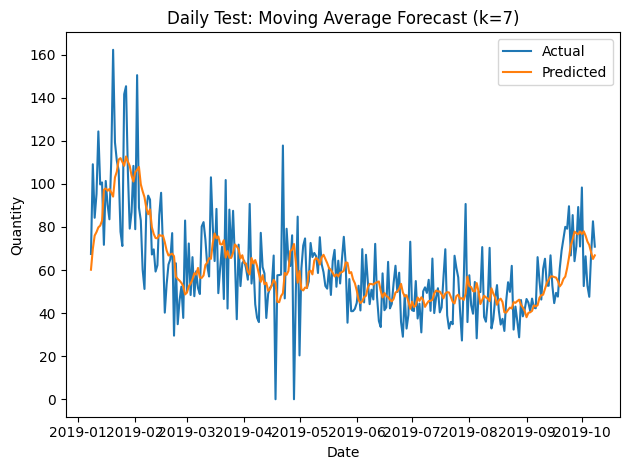

Saved: /home/samanta/Desktop/pharmacy-sales-prediction-lstm-model/results/figures/baseline_daily_moving_avg_k7.png
Weekly MovingAvg(k=4) -> MAE: 68.33226576581079 | RMSE: 97.56712632568973


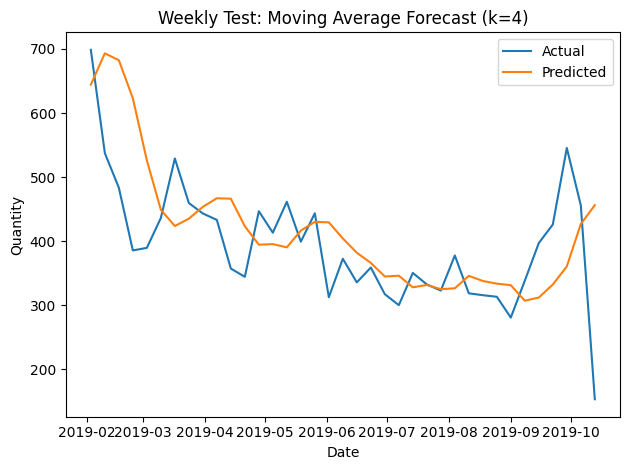

Saved: /home/samanta/Desktop/pharmacy-sales-prediction-lstm-model/results/figures/baseline_weekly_moving_avg_k4.png


In [6]:
K_DAILY = 7
daily_test_pred_ma = moving_average_forecast(daily_test["y"], K_DAILY)
mask = daily_test_pred_ma.notna()
mae_d2, rmse_d2 = mae_rmse(daily_test.loc[mask, "y"], daily_test_pred_ma.loc[mask])

print(f"Daily MovingAvg(k={K_DAILY}) -> MAE:", mae_d2, "| RMSE:", rmse_d2)

plot_forecast(
    daily_test.loc[mask, "ds"],
    daily_test.loc[mask, "y"],
    daily_test_pred_ma.loc[mask],
    f"Daily Test: Moving Average Forecast (k={K_DAILY})",
    os.path.join(FIG_DIR, f"baseline_daily_moving_avg_k{K_DAILY}.png")
)

# WEEKLY moving average
K_WEEKLY = 4
weekly_test_pred_ma = moving_average_forecast(weekly_test["y"], K_WEEKLY)
maskw = weekly_test_pred_ma.notna()
mae_w2, rmse_w2 = mae_rmse(weekly_test.loc[maskw, "y"], weekly_test_pred_ma.loc[maskw])

print(f"Weekly MovingAvg(k={K_WEEKLY}) -> MAE:", mae_w2, "| RMSE:", rmse_w2)

plot_forecast(
    weekly_test.loc[maskw, "ds"],
    weekly_test.loc[maskw, "y"],
    weekly_test_pred_ma.loc[maskw],
    f"Weekly Test: Moving Average Forecast (k={K_WEEKLY})",
    os.path.join(FIG_DIR, f"baseline_weekly_moving_avg_k{K_WEEKLY}.png")
)

In [7]:
baseline_metrics = pd.DataFrame([
    {"model": "naive", "granularity": "daily",  "MAE": mae_d,  "RMSE": rmse_d},
    {"model": "moving_avg", "granularity": "daily",  "MAE": mae_d2, "RMSE": rmse_d2},
    {"model": "naive", "granularity": "weekly", "MAE": mae_w,  "RMSE": rmse_w},
    {"model": "moving_avg", "granularity": "weekly", "MAE": mae_w2, "RMSE": rmse_w2},
])

out_csv = os.path.join(METRICS_DIR, "baseline_metrics.csv")
baseline_metrics.to_csv(out_csv, index=False)

display(baseline_metrics)
print("Saved:", out_csv)

,model,granularity,MAE,RMSE
0,naive,daily,17.862855,24.109943
1,moving_avg,daily,13.183250,17.653833
2,naive,weekly,61.756500,82.244733
3,moving_avg,weekly,68.332266,97.567126


Saved: /home/samanta/Desktop/pharmacy-sales-prediction-lstm-model/results/metrics/baseline_metrics.csv
